<a href="https://colab.research.google.com/github/rtajeong/Hallym_univ_M34/blob/main/lab40_classification_perf_rev1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

분류 성능비교
==

다루는 내용
--
- 정적 성능평가 Confusion matrix  
- 동적 성능평가 ROC

모듈 불러오기
--

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler, LabelEncoder
%matplotlib inline

##  정적 평가, 혼돈 매트릭스 (confusion_matrix)

In [ ]:
# 평가 점수 score
y_score = np.linspace(99, 60, 20).round(1)
print(y_score)

[99.  96.9 94.9 92.8 90.8 88.7 86.7 84.6 82.6 80.5 78.5 76.4 74.4 72.3
 70.3 68.2 66.2 64.1 62.1 60. ]


In [ ]:
# 예측 분류
y_pred=[1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0]
len(y_pred)
y_pred.count(1), y_pred.count(0)

(14, 6)

In [ ]:
# 실제 값
y_test=[1,1,0,1,0,1,1,1,0,0,1,0,1,1,0,1,0,0,0,0]
y_test.count(1), y_test.count(0)

(10, 10)

In [ ]:
pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

,y_test,y_pred
0,1,1
1,1,1
2,0,1
3,1,1
4,0,1
5,1,1
6,1,1
7,1,1
8,0,1
9,0,1


In [ ]:
confusion_matrix(y_test, y_pred)

array([[5, 5],
       [1, 9]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.50      0.62        10
           1       0.64      0.90      0.75        10

    accuracy                           0.70        20
   macro avg       0.74      0.70      0.69        20
weighted avg       0.74      0.70      0.69        20



- Precision  = 모델이 옳다고 한 것이 실제로 옳은 비율     TP / ( TP + FP ) 
- Recall =  실제 정답인 것들 중, 모델이 정답이라고 예측한 것    TP / TP+FN
- f1-score = Precision과 Recall의 조화평균  (2 x  Precision x Recall ) /  (Precision + Recall)
- support는 이 모델에서 응답한 샘플의 수이다

- precision_0 = 5/(5+1) = 0.83
- precision_1 = 9/(5+9) = 0.64
- macro average precision = (0.83 + 0.64)/2 = 0.735
- micro average precision = (5+9)/(6+14) = 0.7
- weighted average precision = 0.83x10/20 + 0.64x10/20 = 0.735

랭킹 (순서를 평가)
--

In [ ]:
result = pd.DataFrame(list(zip(y_score, y_pred, y_test)), 
                      columns=['score', 'predict', 'real'])
result['correct'] = (result.predict == result.real)
result.head(20)

,score,predict,real,correct
0,99.0,1,1,True
1,96.9,1,1,True
2,94.9,1,0,False
3,92.8,1,1,True
4,90.8,1,0,False
5,88.7,1,1,True
6,86.7,1,1,True
7,84.6,1,1,True
8,82.6,1,0,False
9,80.5,1,0,False


ROC로 성능 평가 (맞춘 순서를 평가)
- tpr = TP/P = TP/(TP+FN) : 실제 P 인경우 대비 TP 비율 (= recall)
- fpr = FP/N = FP/(FP+TN) : 실제 N 인 경우 대비 FP 비율
- 아레 roc curve 의 게산은 책에 붙여 놓음

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

In [ ]:
fpr, tpr

(array([0. , 0. , 0. , 0.1, 0.1, 0.2, 0.2, 0.4, 0.4, 0.5, 0.5, 0.6, 0.6,
        1. ]),
 array([0. , 0.1, 0.2, 0.2, 0.3, 0.3, 0.6, 0.6, 0.7, 0.7, 0.9, 0.9, 1. ,
        1. ]))

In [ ]:
# just to see how many 1 and 0 are in the test set
total_p, total_n  = (np.array(y_test)==1).sum(), (np.array(y_test)==0).sum()
total_p, total_n

(10, 10)

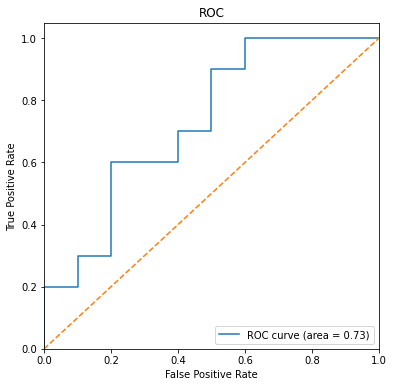

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")

## 3명의 능력 비교

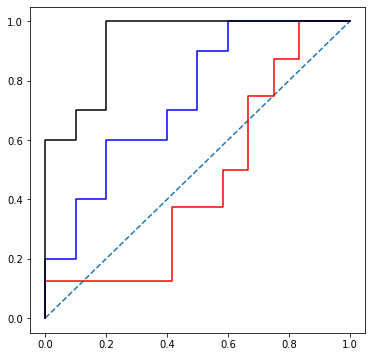

In [ ]:
y_real=[[1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0],
        [1,1,0,1,1,0,1,1,0,0,1,0,1,1,0,1,0,0,0,0],
        [1,1,1,1,1,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0]]

plt.figure(figsize=(6,6))    
fpr = dict()
tpr = dict()
plt.plot([0, 1], [0, 1], linestyle='--')

my_color = ['r', 'b', 'k']
for i in range(3):
    fpr, tpr, _ = roc_curve(y_real[i], y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, c=my_color[i])

In [ ]:
# for exam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [ ]:
id = [1, 5, 8, 6, 10, 9, 3, 7, 4, 2]
y_score = [99.2, 98.3, 95.2, 91.0, 89.3, 85.3, 84.1, 79.4, 78.7, 77.1]
y = [True, True, False, True, False, True, True, False, False, False]
df = pd.DataFrame({'id': id, 'y_pred_proba': y_score, 'y_real': y})
df = df.set_index('id')
df

,y_pred_proba,y_real
id,,
1,99.2,True
5,98.3,True
8,95.2,False
6,91.0,True
10,89.3,False
9,85.3,True
3,84.1,True
7,79.4,False
4,78.7,False


In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, _ = roc_curve(df['y_real'], df['y_pred_proba'])
roc_auc = auc(fpr, tpr)

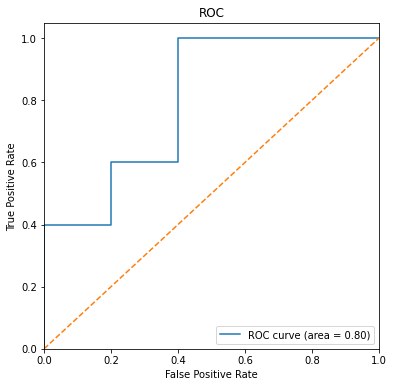

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")